In [2]:
import pandas as pd
file_path = 'Final_dataset.xlsx'
data = pd.read_excel(file_path)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data

,Unnamed: 0,Team,Match,Match Date,Total Distance Covered,Distance Covered Speed 0-0.2 m/s,Distance Covered Speed 0.21-2 m/s,Distance Covered Speed 2.01-4 m/s,Distance Covered Speed 4.01-5.5 m/s,Distance Covered Speed 5.51-7 m/s,...,Current Form Ties,High Speed Runs Attacking,High Speed Runs Defensive,Sprints Attacking,Sprints Defensive,Home/Away,Goals Scored,Goals Conceded,Goal Difference,Result
0,0,Rizespor,Rizespor 1:2 Fenerbahce,11.09.20,111784,279,42168,43537,16792,7481,...,0,265.00,218.00,31.00,57.00,Home,1,2,-1,Lose
1,1,Rizespor,Kasimpasa 2:0 Rizespor,20.09.20,114153,276,39961,44998,19583,7853,...,0,237.00,261.00,57.00,39.00,Away,0,2,-2,Lose
2,2,Rizespor,Rizespor 1:1 Alanyaspor,27.09.20,109381,355,42605,41928,16425,6991,...,0,287.00,233.00,39.00,24.00,Home,1,1,0,Tie
3,3,Rizespor,Rizespor 1:0 Kayserispor,01.11.20,110355,232,43845,44061,15360,5918,...,1,252.00,182.00,25.00,37.00,Home,1,0,1,Win
4,4,Rizespor,Hatayspor 2:2 Rizespor,22.11.20,114306,297,41501,44260,17930,8198,...,1,320.00,211.00,58.00,52.00,Away,2,2,0,Tie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Konyaspor,Konyaspor 0:0 Hatayspor,24.04.21,109351,342,44368,39838,17116,6804,...,1,215.00,243.00,24.00,35.00,Home,0,0,0,Tie
668,668,Konyaspor,Galatasaray 1:0 Konyaspor,28.04.21,115727,246,41050,46761,18932,7172,...,2,309.00,164.00,41.00,52.00,Away,0,1,-1,Lose
669,669,Konyaspor,Konyaspor 5:1 Fatih Karagumruk,02.05.21,108085,332,41587,39416,17449,7855,...,2,330.00,197.00,18.00,42.00,Home,5,1,4,Win
670,670,Konyaspor,Goztepe 0:1 Konyaspor,08.05.21,109400,320,38555,42085,18700,8391,...,1,356.00,222.00,26.00,47.00,Away,1,0,1,Win


In [3]:
data.columns

Index(['Unnamed: 0', 'Team', 'Match', 'Match Date', 'Total Distance Covered',
       'Distance Covered Speed 0-0.2 m/s', 'Distance Covered Speed 0.21-2 m/s',
       'Distance Covered Speed 2.01-4 m/s',
       'Distance Covered Speed 4.01-5.5 m/s',
       'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s',
       'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²',
       'Maximal Speed', 'Home Team', 'Home Score', 'Away Team', 'Away Score',
       'Cumulative Points', 'Cumulative Goal Difference',
       'Cumulative Goals Scored', 'Cumulative Goals Conceded',
       'Cumulative Wins', 'Cumulative Losses', 'Cumulative Ties',
       'Current Form Points', 'Current Form Goal Difference',
       'Current Form Goals Scored', 'Current Form Goals Conceded',
       'Current Form Wins', 'Current Form Losses', 'Current Form Ties',
       'High Speed Runs Attacking', 'High Speed Runs Defensive',
       'Sprints Attacking', 'Sprints Defensive', 'Home/Away', 'Goals S

In [4]:
df = data
df[['Home Team', 'Away Team']] = df['Match'].str.extract(r'(\w+)\s\d+[:]\d+\s(\w+)')
# Identify if the current row team is Home or Away and add the other team's data
df['Opponent'] = df.apply(lambda row: row['Away Team'] if row['Team'] == row['Home Team'] else row['Home Team'], axis=1)

# Drop intermediate columns used for extraction
df = df.drop(columns=['Home Team', 'Away Team'])

def rename_opponent_columns(df):
    columns_to_rename = [
        'Total Distance Covered', 'Distance Covered Speed 0-0.2 m/s', 'Distance Covered Speed 0.21-2 m/s',
        'Distance Covered Speed 2.01-4 m/s', 'Distance Covered Speed 4.01-5.5 m/s',
        'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s',
        'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²', 'Maximal Speed',
        'Cumulative Points', 'Cumulative Goal Difference', 'Cumulative Goals Scored',
        'Cumulative Goals Conceded', 'Cumulative Wins', 'Cumulative Losses', 'Cumulative Ties',
        'High Speed Runs Attacking', 'High Speed Runs Defensive', 'Sprints Attacking',
        'Sprints Defensive', 'Home/Away', 'Goal Difference', 'Result'
    ]

    # Create a mapping for renaming
    rename_mapping = {col: f"{col}_opponent" for col in columns_to_rename}

    return rename_mapping
def merge_opponent_data(df):
    # Extract the necessary columns
    rename_mapping = rename_opponent_columns(df)
    opponent_columns = ['Match', 'Team'] + list(rename_mapping.keys())
    
    # Rename the columns for merging
    opponent_df = df[opponent_columns].rename(columns=rename_mapping)
    
    # Adjust the merge to use the correct columns
    merged_df = df.merge(opponent_df, left_on=['Match', 'Opponent'], right_on=['Match', 'Team'], how='left', suffixes=('', '_opponent'))
    
    # Drop the extra opponent team column used for merging
    merged_df = merged_df.drop(columns=['Team_opponent'])
    
    return merged_df

# Apply the merging function to the dataframe
merged_df = merge_opponent_data(df)

# Display the updateddataframe to the user
merged_df

,Unnamed: 0,Team,Match,Match Date,Total Distance Covered,Distance Covered Speed 0-0.2 m/s,Distance Covered Speed 0.21-2 m/s,Distance Covered Speed 2.01-4 m/s,Distance Covered Speed 4.01-5.5 m/s,Distance Covered Speed 5.51-7 m/s,...,Cumulative Wins_opponent,Cumulative Losses_opponent,Cumulative Ties_opponent,High Speed Runs Attacking_opponent,High Speed Runs Defensive_opponent,Sprints Attacking_opponent,Sprints Defensive_opponent,Home/Away_opponent,Goal Difference_opponent,Result_opponent
0,0,Rizespor,Rizespor 1:2 Fenerbahce,11.09.20,111784,279,42168,43537,16792,7481,...,0.00,0.00,0.00,346.00,233.00,58.00,28.00,Away,1.00,Win
1,1,Rizespor,Kasimpasa 2:0 Rizespor,20.09.20,114153,276,39961,44998,19583,7853,...,0.00,1.00,0.00,345.00,221.00,45.00,45.00,Home,2.00,Win
2,2,Rizespor,Rizespor 1:1 Alanyaspor,27.09.20,109381,355,42605,41928,16425,6991,...,2.00,0.00,0.00,320.00,220.00,38.00,35.00,Away,0.00,Tie
3,3,Rizespor,Rizespor 1:0 Kayserispor,01.11.20,110355,232,43845,44061,15360,5918,...,1.00,3.00,0.00,259.00,204.00,26.00,34.00,Away,-1.00,Lose
4,4,Rizespor,Hatayspor 2:2 Rizespor,22.11.20,114306,297,41501,44260,17930,8198,...,2.00,1.00,1.00,300.00,219.00,47.00,44.00,Home,0.00,Tie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Konyaspor,Konyaspor 0:0 Hatayspor,24.04.21,109351,342,44368,39838,17116,6804,...,8.00,6.00,6.00,296.00,172.00,66.00,25.00,Away,0.00,Tie
668,668,Konyaspor,Galatasaray 1:0 Konyaspor,28.04.21,115727,246,41050,46761,18932,7172,...,21.00,8.00,4.00,230.00,317.00,56.00,37.00,Home,1.00,Win
669,669,Konyaspor,Konyaspor 5:1 Fatih Karagumruk,02.05.21,108085,332,41587,39416,17449,7855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,670,Konyaspor,Goztepe 0:1 Konyaspor,08.05.21,109400,320,38555,42085,18700,8391,...,6.00,8.00,8.00,257.00,288.00,50.00,31.00,Home,-1.00,Lose


Every row has all the metrics we need to predict the match outcome

In [5]:
merged_df.columns

Index(['Unnamed: 0', 'Team', 'Match', 'Match Date', 'Total Distance Covered',
       'Distance Covered Speed 0-0.2 m/s', 'Distance Covered Speed 0.21-2 m/s',
       'Distance Covered Speed 2.01-4 m/s',
       'Distance Covered Speed 4.01-5.5 m/s',
       'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s',
       'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²',
       'Maximal Speed', 'Home Score', 'Away Score', 'Cumulative Points',
       'Cumulative Goal Difference', 'Cumulative Goals Scored',
       'Cumulative Goals Conceded', 'Cumulative Wins', 'Cumulative Losses',
       'Cumulative Ties', 'Current Form Points',
       'Current Form Goal Difference', 'Current Form Goals Scored',
       'Current Form Goals Conceded', 'Current Form Wins',
       'Current Form Losses', 'Current Form Ties', 'High Speed Runs Attacking',
       'High Speed Runs Defensive', 'Sprints Attacking', 'Sprints Defensive',
       'Home/Away', 'Goals Scored', 'Goals Conceded', 

In [6]:
merged_df = merged_df.drop(columns=['Unnamed: 0'])

# Rename 'Team' to 'Home_team'
merged_df = merged_df.rename(columns={'Team': 'Home_team'})

# Columns to append '_Home'
columns_to_append_home = [
    'Total Distance Covered',
    'Distance Covered Speed 0-0.2 m/s', 'Distance Covered Speed 0.21-2 m/s',
    'Distance Covered Speed 2.01-4 m/s', 'Distance Covered Speed 4.01-5.5 m/s',
    'Distance Covered Speed 5.51-7 m/s', 'Distance Covered Speed >7 m/s',
    'No. of Accelerations 5.5-7 m/s²', 'No. of Accelerations >7 m/s²', 'Maximal Speed','Cumulative Points',
    'Cumulative Goal Difference', 'Cumulative Goals Scored',
    'Cumulative Goals Conceded', 'Cumulative Wins', 'Cumulative Losses',
    'Cumulative Ties', 'Current Form Points', 'Current Form Goal Difference',
    'Current Form Goals Scored', 'Current Form Goals Conceded',
    'Current Form Wins', 'Current Form Losses', 'Current Form Ties',
    'High Speed Runs Attacking', 'High Speed Runs Defensive',
    'Sprints Attacking', 'Sprints Defensive', 'Goals Scored', 'Goals Conceded',
    'Goal Difference', 'Result',
]

# Append '_Home' to specified columns
merged_df = merged_df.rename(columns={col: col + '_Home' for col in columns_to_append_home})

# Rename 'Home/Away' to 'Home/Away_Home'
merged_df = merged_df.rename(columns={'Home/Away': 'Home/Away_Home'})

In [7]:
merged_df.columns

Index(['Home_team', 'Match', 'Match Date', 'Total Distance Covered_Home',
       'Distance Covered Speed 0-0.2 m/s_Home',
       'Distance Covered Speed 0.21-2 m/s_Home',
       'Distance Covered Speed 2.01-4 m/s_Home',
       'Distance Covered Speed 4.01-5.5 m/s_Home',
       'Distance Covered Speed 5.51-7 m/s_Home',
       'Distance Covered Speed >7 m/s_Home',
       'No. of Accelerations 5.5-7 m/s²_Home',
       'No. of Accelerations >7 m/s²_Home', 'Maximal Speed_Home', 'Home Score',
       'Away Score', 'Cumulative Points_Home',
       'Cumulative Goal Difference_Home', 'Cumulative Goals Scored_Home',
       'Cumulative Goals Conceded_Home', 'Cumulative Wins_Home',
       'Cumulative Losses_Home', 'Cumulative Ties_Home',
       'Current Form Points_Home', 'Current Form Goal Difference_Home',
       'Current Form Goals Scored_Home', 'Current Form Goals Conceded_Home',
       'Current Form Wins_Home', 'Current Form Losses_Home',
       'Current Form Ties_Home', 'High Speed Runs Attac

In [8]:
data_unique = merged_df.drop_duplicates(subset=['Match'], keep='first')


In [9]:
data_unique.to_excel("m.xlsx")

In [10]:
print("\nMissing Values:")
data_unique.isnull().sum()


Missing Values:


Home_team                                  0
Match                                      0
Match Date                                 0
Total Distance Covered_Home                0
Distance Covered Speed 0-0.2 m/s_Home      0
                                        ... 
Sprints Attacking_opponent               108
Sprints Defensive_opponent               108
Home/Away_opponent                       108
Goal Difference_opponent                 108
Result_opponent                          108
Length: 63, dtype: int64

We have a lot of missing data regarding low ranking teams, this could be a huge issue for our model.
108/336 regarding the opponent match, around 30% of missing data. They are a lot but we are gonna try deal with it.
Since making assumption here is hard, we are just gonna let a boosting model deal with it

In [16]:
data_unique['Result_Home'] = data_unique['Result_Home'].map({'Lose': -1, 'Tie': 0, 'Win': 1})

y = data_unique['Result_Home']

# Define the columns to be removed (features that are not needed for training)
columns_to_remove = [
    'Match', 'Match Date', 'Goals Scored_Home', 'Goals Conceded_Home', 
    'Goal Difference_Home', 'Result_Home', 'Goal Difference_opponent', 
    'Result_opponent', 'Home Score', 'Away Score'
]

# Define the feature matrix X by dropping the specified columns
X = data_unique.drop(columns=columns_to_remove)

C:\Users\emanu\AppData\Local\Temp\ipykernel_26320\3190353515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_unique['Result_Home'] = data_unique['Result_Home'].map({'Lose': -1, 'Tie': 0, 'Win': 1})


In [17]:
y

0     -1
1     -1
2      0
3      1
4      0
      ..
575   -1
589    1
601    0
619    1
631    0
Name: Result_Home, Length: 336, dtype: int64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 631
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Home_team                                     336 non-null    object 
 1   Total Distance Covered_Home                   336 non-null    int64  
 2   Distance Covered Speed 0-0.2 m/s_Home         336 non-null    int64  
 3   Distance Covered Speed 0.21-2 m/s_Home        336 non-null    int64  
 4   Distance Covered Speed 2.01-4 m/s_Home        336 non-null    int64  
 5   Distance Covered Speed 4.01-5.5 m/s_Home      336 non-null    int64  
 6   Distance Covered Speed 5.51-7 m/s_Home        336 non-null    int64  
 7   Distance Covered Speed >7 m/s_Home            336 non-null    int64  
 8   No. of Accelerations 5.5-7 m/s²_Home          336 non-null    int64  
 9   No. of Accelerations >7 m/s²_Home             336 non-null    int64  


In [18]:
#!pip install lightgbm

X = X.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Step 2: Split the Data
X_train, X_test, y_home_train, y_home_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the LightGBM Model for Home Score
lgb_train_home = lgb.Dataset(X_train, y_home_train)
lgb_test_home = lgb.Dataset(X_test, y_home_test, reference=lgb_train_home)

params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'verbose': -1
}

gbm_home = lgb.train(params, lgb_train_home, num_boost_round=100, valid_sets=[lgb_train_home, lgb_test_home])


# Step 4: Evaluate the Models
y_home_pred = gbm_home.predict(X_test, num_iteration=gbm_home.best_iteration)

mae_home = mean_absolute_error(y_home_test, y_home_pred)

print(f'Mean Absolute Error for Home Score: {mae_home}')


Mean Absolute Error for Home Score: 0.6307351618439633


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


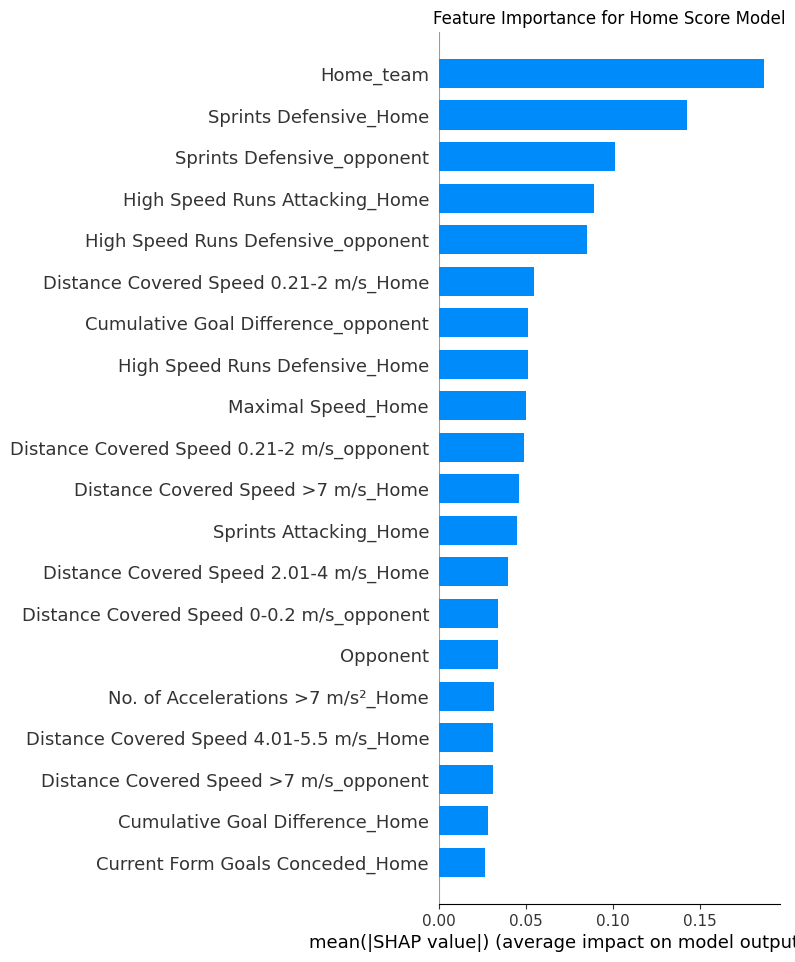

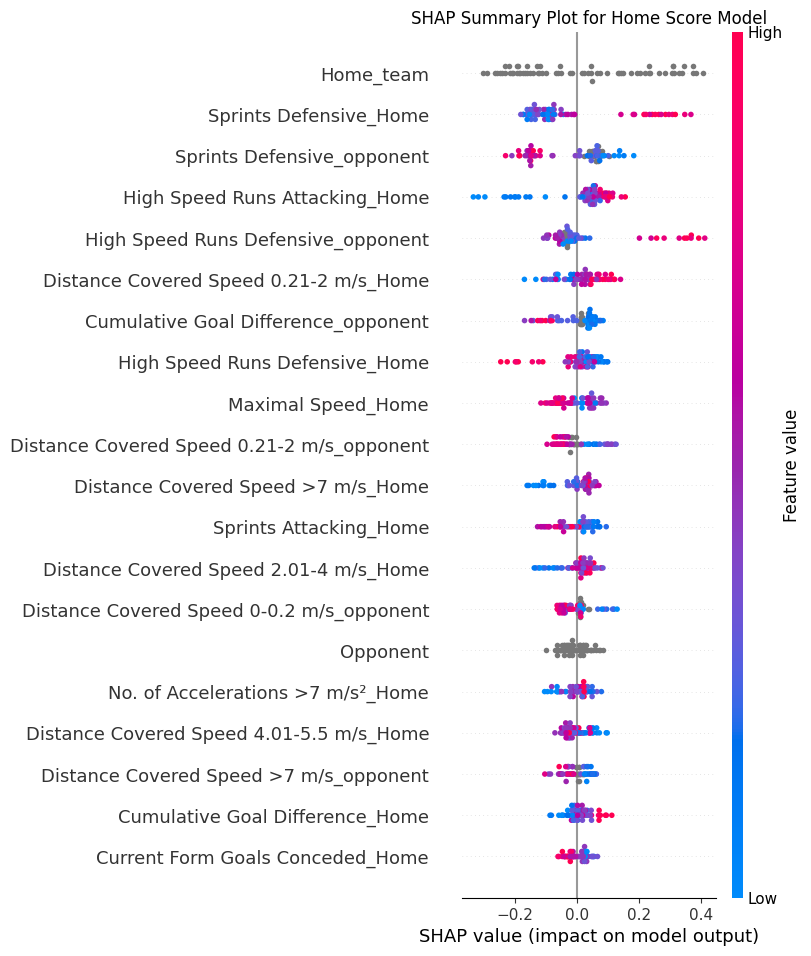

In [19]:
#!pip install shap
import shap
import matplotlib.pyplot as plt
# Step 5: Explain the Models using SHAP
# Explain the Home Score Model
explainer_home = shap.Explainer(gbm_home)
shap_values_home = explainer_home(X_test)

# Step 6: Visualize SHAP Values
# Feature importance for Home Score Model
shap.summary_plot(shap_values_home, X_test, plot_type="bar", show=False)
plt.title("Feature Importance for Home Score Model")
plt.show()


# Detailed SHAP summary plot for Home Score Model
shap.summary_plot(shap_values_home, X_test, show=False)
plt.title("SHAP Summary Plot for Home Score Model")
plt.show()




In [ ]:
X.columns

Index(['Home_team', 'Total Distance Covered_Home',
       'Distance Covered Speed 0-0.2 m/s_Home',
       'Distance Covered Speed 0.21-2 m/s_Home',
       'Distance Covered Speed 2.01-4 m/s_Home',
       'Distance Covered Speed 4.01-5.5 m/s_Home',
       'Distance Covered Speed 5.51-7 m/s_Home',
       'Distance Covered Speed >7 m/s_Home',
       'No. of Accelerations 5.5-7 m/s²_Home',
       'No. of Accelerations >7 m/s²_Home', 'Maximal Speed_Home',
       'Cumulative Points_Home', 'Cumulative Goal Difference_Home',
       'Cumulative Goals Scored_Home', 'Cumulative Goals Conceded_Home',
       'Cumulative Wins_Home', 'Cumulative Losses_Home',
       'Cumulative Ties_Home', 'Current Form Points_Home',
       'Current Form Goal Difference_Home', 'Current Form Goals Scored_Home',
       'Current Form Goals Conceded_Home', 'Current Form Wins_Home',
       'Current Form Losses_Home', 'Current Form Ties_Home',
       'High Speed Runs Attacking_Home', 'High Speed Runs Defensive_Home',
     